<a href="https://colab.research.google.com/github/MehdiBenSalah/pfa/blob/main/3Dvisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [2]:
!pip install SimpleITK

In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline


path='/content/1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd'
data =sitk.ReadImage(path)
print(data)
spacing = data.GetSpacing()
print('spacing: ', spacing)
scan = sitk.GetArrayFromImage(data)

Image (0x55bc5adfd9c0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 897
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 870
  UpdateMTime: 896
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 171]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 171]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 171]
  Spacing: [0.488281, 0.488281, 1.8]
  Origin: [-127.756, -277.756, -351.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.488281 0 0
0 0.488281 0
0 0 1.8

  PointToIndexMatrix: 
2.048 0 0
0 2.048 0
0 0 0.555556

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x55bc5b2cdde0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
    

In [4]:
!pip install scikit-image

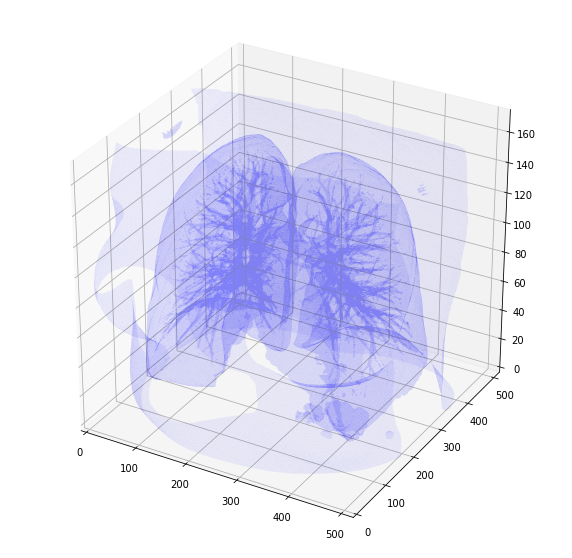

In [5]:
import numpy as np
from skimage import measure, feature
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d(image, threshold=-400):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    # p = p[:,:,::-1]
    
    verts,faces = measure.marching_cubes_classic(p, threshold) # try without classic later

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

# 3D PLOTTING BONE   
#plot_3d(scan,300)
# 3D PLOTTING LUNG    
plot_3d(scan)